## Transforming scalars encoded in matrices

from https://pennylane.ai/qml/demos/tutorial_intro_qsvt/

My personal perspective on QSVT is that it is really a result in linear algebra that tells us how to transform matrices that are inside larger unitary matrices.

Let’s start with the simplest example: we encode a scalar $a$ inside a 2x2 matrix $U(a)$. By encoding we mean that the matrix depends explicitly on $a$. This encoding can be achieved in multiple ways, for example:

$$ \begin{split}U(a) = \begin{pmatrix} a & \sqrt{1-a^2}\\ \sqrt{1-a^2} & -a \end{pmatrix}.\end{split} $$
The parameter $a$ must lie between -1 and 1 to ensure the matrix is unitary, but this is just a matter of rescaling. We want the matrix to be unitary so that it can be implemented on a quantum computer.

We now ask the crucial question that will get everything started: what happens if we repeatedly alternate multiplication of this matrix by some other matrix? 🤔 There are multiple choices for the “other matrix”, for example

$$ \begin{split}S(\phi) = \begin{pmatrix} e^{i\phi} & 0\\ 0 & e^{-i\phi} \end{pmatrix},\end{split} $$
which has the advantage of being diagonal. This unitary is known as the signal-processing operator. It depends on a choice of angle $\phi$ that will play an important role.

The answer to our question is encapsulated in a method known as quantum signal processing (QSP). If we alternate products of $U(a)$ and $S(\phi)$, keeping $a$ fixed and varying $\phi$, the top-left corner of the resulting matrix is a polynomial transformation of $a$. Mathematically,

$$ \begin{split}S(\phi_0)\prod_{k=1}^d U(a) S(\phi_k) = \begin{pmatrix} P(a) & *\\ * & * \end{pmatrix}.\end{split} $$
The asterisk $*$ is used to indicate that we are not interested in these entries.

The intuition behind this result is that every time we multiply by $U(a)$, its entries are transformed to a polynomial of higher degree, and by interleaving signal-processing operators, it’s possible to tune the coefficients of the polynomial. For example

$$ \begin{split}S(-\pi/2) U(a) S(\pi/2) U(a) S(0) = \begin{pmatrix} 2a^2-1 & 0\\ 0 & 2a^2 -1 \end{pmatrix}.\end{split} $$
The main quantum signal processing theorem states that it is possible to find angles that implement a large class of complex polynomial transformations $P(a)$ with maximum degree and parity determined by the number of angles 3.

The results of the theorem can then be extended to show that using additional rotations, it is possible to find $d+1$ angles that implement any real polynomial of parity $d \mod 2$ and maximum degree $d$. Multiple QSP sequences can then be used to implement real polynomials of indefinite parity. Finding the desired angles can be done efficiently in practice, but identifying the best methods is an active area of research. You can learn more in our QSP demo and in Ref. 3.

For now, let’s look at a simple example of how quantum signal processing can be implemented using PennyLane. We aim to perform a transformation by the Legendre polynomial $(5 x^3 - 3x)/2$, for which we use pre-computed optimal angles. As you will soon learn, QSP can be viewed as a special case of QSVT. We thus use the qsvt() operation to construct the output matrix and compare the resulting transformation to the target polynomial.

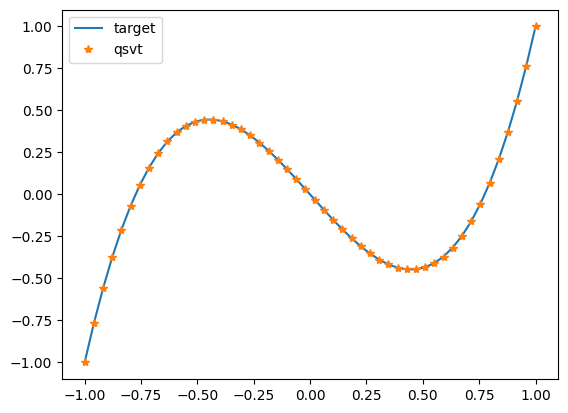

In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt


def target_poly(a):
    return 0.5 * (5 * a**3 - 3 * a)


# pre-optimized angles
angles = [-0.20409113, -0.91173829, 0.91173829, 0.20409113]


def qsvt_output(a):
    # output matrix
    out = qml.matrix(qml.qsvt(a, angles, wires=[0]))
    return out[0, 0]  # top-left entry


a_vals = np.linspace(-1, 1, 50)
qsvt = [np.real(qsvt_output(a)) for a in a_vals]  # neglect small imaginary part
target = [target_poly(a) for a in a_vals]


plt.plot(a_vals, target, label="target")
plt.plot(a_vals, qsvt, "*", label="qsvt")

plt.legend()
plt.show()